# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [331]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", 
                 index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


데이터 확인

In [332]:
df.shape

(200, 4)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [334]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

범주형 데이터 원핫인코딩

In [335]:
df = pd.get_dummies(df, columns = ["Gender"])

In [336]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0
...,...,...,...,...,...
196,35,120,79,1,0
197,45,126,28,1,0
198,32,126,74,0,1


minmaxscaling 진행

In [337]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.019231,0.000000,0.387755,0.0,1.0
1,0.057692,0.000000,0.816327,0.0,1.0
2,0.038462,0.008197,0.051020,1.0,0.0
3,0.096154,0.008197,0.775510,1.0,0.0
4,0.250000,0.016393,0.397959,1.0,0.0
...,...,...,...,...,...
195,0.326923,0.860656,0.795918,1.0,0.0
196,0.519231,0.909836,0.275510,1.0,0.0
197,0.269231,0.909836,0.744898,0.0,1.0
198,0.269231,1.000000,0.173469,0.0,1.0


Elbow method를 이용해 k값 결정 (SSE 찍어보기)

In [338]:
import matplotlib.pyplot as plt

In [339]:
from sklearn.cluster import KMeans

n_cluster = []
sse = []
for n in range(3, 15, 2):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df_scaled)
    n_cluster += [n]
    sse += [kmeans.inertia_]

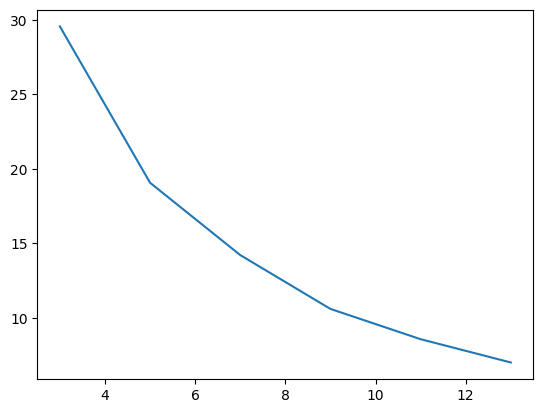

In [340]:
plt.plot(n_cluster, sse)   

In [341]:
#elbow point를 5 or 9로 결정
n_clusters1 = 5
n_clusters2 = 9

In [342]:
df_scaled5 = df_scaled
kmeans5 = KMeans(n_clusters=n_clusters1)
kmeans5.fit(df_scaled5)

clustered_df_scaled5 = kmeans5.predict(df_scaled5)

실루엣 계수확인

In [343]:
from sklearn.metrics import silhouette_score

mean_score5 = silhouette_score(df_scaled5, clustered_df_scaled5)
print(mean_score5)


0.37089464698896923


시각화

In [344]:
df_scaled5['Cluster'] = clustered_df_scaled5

Text(0.5, 0.92, 'Customer Data with 5 Segment')

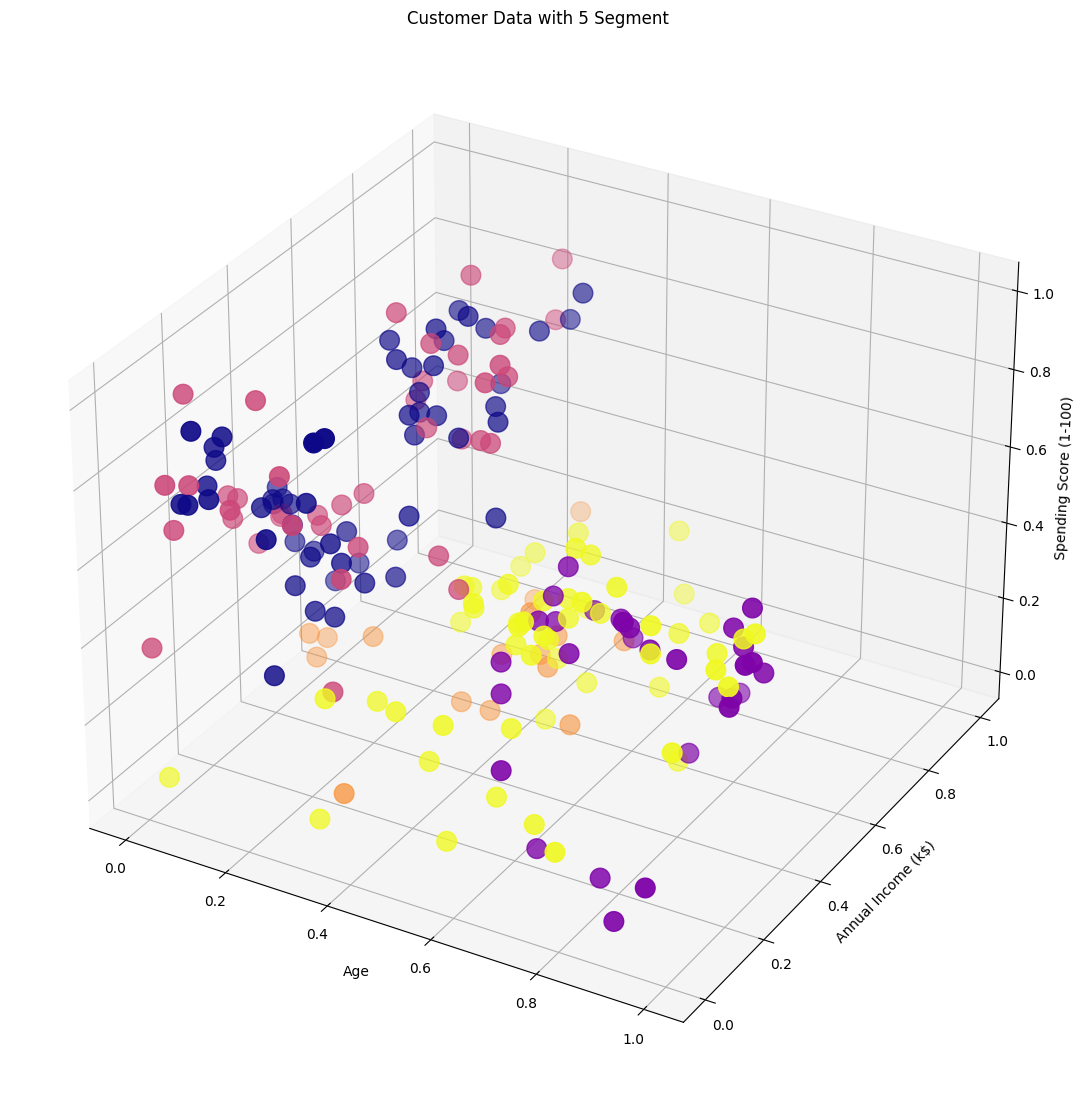

In [345]:
col_list = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(122,projection='3d')
ax.scatter(df_scaled5[col_list[0]] , df_scaled5[col_list[1]] , df_scaled5[col_list[2]] ,c=df_scaled5['Cluster'],cmap='plasma', s=200)
ax.set_xlabel(col_list[0])
ax.set_ylabel(col_list[1])
ax.set_zlabel(col_list[2])
ax.set_title('Customer Data with 5 Segment')

k = 9일 때 확인

In [348]:
kmeans9 = KMeans(n_clusters=n_clusters2)
kmeans9.fit(df_scaled9)

clustered_df_scaled9 = kmeans9.predict(df_scaled9)
df_scaled9 = df_scaled9.drop(columns = ['Cluster'],axis=1)

In [349]:
from sklearn.metrics import silhouette_score

mean_score9 = silhouette_score(df_scaled9, clustered_df_scaled9)
print(mean_score9)

0.4080360409044409


In [350]:
df_scaled9['Cluster'] = clustered_df_scaled9

In [351]:
df_scaled9


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,0.019231,0.000000,0.387755,0.0,1.0,6
1,0.057692,0.000000,0.816327,0.0,1.0,6
2,0.038462,0.008197,0.051020,1.0,0.0,8
3,0.096154,0.008197,0.775510,1.0,0.0,5
4,0.250000,0.016393,0.397959,1.0,0.0,5
...,...,...,...,...,...,...
195,0.326923,0.860656,0.795918,1.0,0.0,1
196,0.519231,0.909836,0.275510,1.0,0.0,7
197,0.269231,0.909836,0.744898,0.0,1.0,2
198,0.269231,1.000000,0.173469,0.0,1.0,4


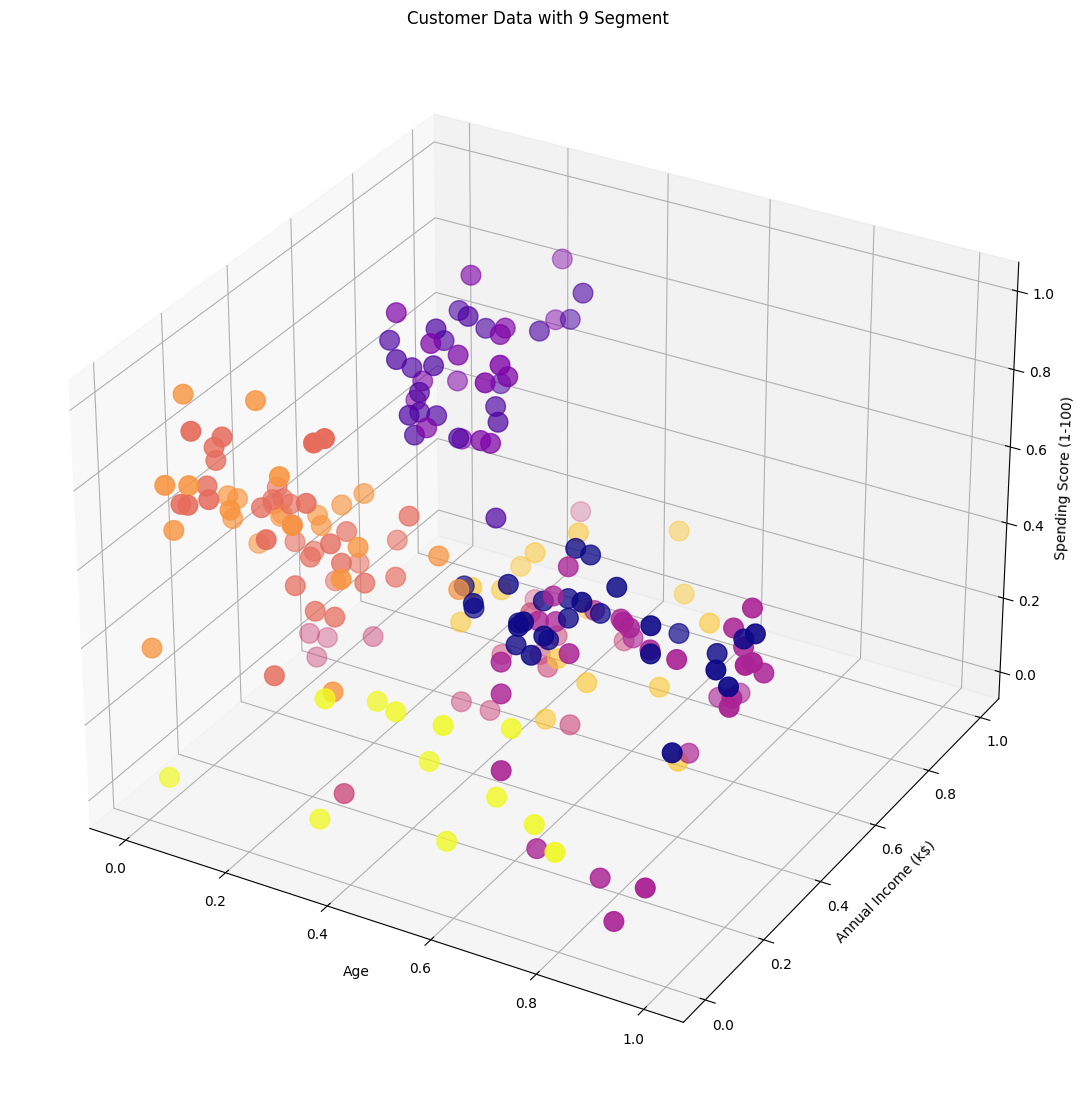

In [352]:
col_list = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(122,projection='3d')
ax.scatter(df_scaled9[col_list[0]] , df_scaled9[col_list[1]] , df_scaled9[col_list[2]] ,c=df_scaled9['Cluster'],cmap='plasma', s=200)
ax.set_xlabel(col_list[0])
ax.set_ylabel(col_list[1])
ax.set_zlabel(col_list[2])
ax.set_title('Customer Data with 9 Segment');   ## k =5 보다 k= 9일 떄 실루엣 수치가 더 높고 좀 더 군집간 분리도가 좋다.